# Financial Technical Analysis with DataFrames, PyTorch, Pandas

In [ ]:
import pandas as pd
data = pd.read_csv("../_data/AAPL.csv", index_col=0, parse_dates=True) #index_col sets date column as index instead of adding an int, parse_dates sets it from string to a 'datetime64' datatype
data.head()    #use data.tail() for last 5 rows instead

In [ ]:
adate = data.loc['2022-07-05']   #access data at a specific location (or date in this example)
last = data.iloc[-1]   #gets last index of dataset
print(f"{adate}\nLast date:\n{last}")

In [ ]:
dailyChange = data['Close'] - data['Open']
dailyPctChg = (data['Close'] - data['Open'])/data['Open']*100
dailyPctChg

In [5]:
boughtDate = data['Close'].iloc[0]
soldDate = data['Close'].iloc[-1]
# norm is the daily change from the first and current row date
# (Xn - X0)/Xn
norm = data['Close']/data['Close'].iloc[0]
norm

Date
2021-09-10    1.000000
2021-09-13    1.003893
2021-09-14    0.994294
2021-09-15    1.000403
2021-09-16    0.998792
                ...   
2022-09-02    1.045915
2022-09-06    1.037323
2022-09-07    1.046922
2022-09-08    1.036853
2022-09-09    1.056387
Name: Close, Length: 252, dtype: float64

In [6]:
data['Daily chg'] = data['Close'] - data['Open']

In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Daily chg
Date,,,,,,,
2021-09-10,155.000000,155.479996,148.699997,148.970001,148.139893,140893200,-6.029999
2021-09-13,150.630005,151.419998,148.750000,149.550003,148.716660,102404300,-1.080002
2021-09-14,150.350006,151.070007,146.910004,148.119995,147.294632,109296300,-2.230011
2021-09-15,148.559998,149.440002,146.369995,149.029999,148.199539,83281300,0.470001
2021-09-16,148.440002,148.970001,147.220001,148.789993,147.960876,68034100,0.349991


In [8]:
data['Normalized'] = data['Close'] / data['Close'].iloc[0]

In [15]:
data['Close'].argmin()

193

In [22]:
data.iloc[193]

Open          1.320800e+02
High          1.323900e+02
Low           1.290400e+02
Close         1.300600e+02
Adj Close     1.298796e+02
Volume        1.081239e+08
Daily chg    -2.020004e+00
Normalized    8.730617e-01
Name: 2022-06-16 00:00:00, dtype: float64

## Visualizing Data
* Using Matplotlib
* Subplots
* Multple plots
* Bar plots

In [1]:
import pandas as pd
data = pd.read_csv("../_data/AAPL.csv", index_col=0, parse_dates=True) #index_col sets date column as index instead of adding an int, parse_dates sets it from string to a 'datetime64' datatype
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-10,155.000000,155.479996,148.699997,148.970001,148.139893,140893200
2021-09-13,150.630005,151.419998,148.750000,149.550003,148.716660,102404300
2021-09-14,150.350006,151.070007,146.910004,148.119995,147.294632,109296300
2021-09-15,148.559998,149.440002,146.369995,149.029999,148.199539,83281300
2021-09-16,148.440002,148.970001,147.220001,148.789993,147.960876,68034100


<IPython.core.display.Javascript object>


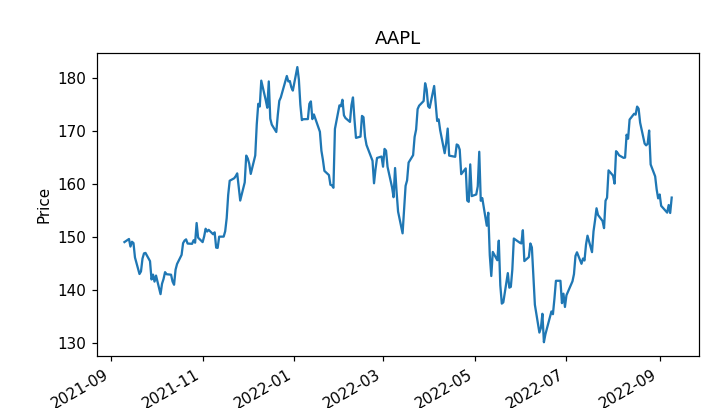

Text(0.5, 1.0, 'AAPL')

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig, ax = plt.subplots()
data['Close'].plot(ax=ax)
ax.set_ylabel("Price")
ax.set_title("AAPL")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date'>

<IPython.core.display.Javascript object>


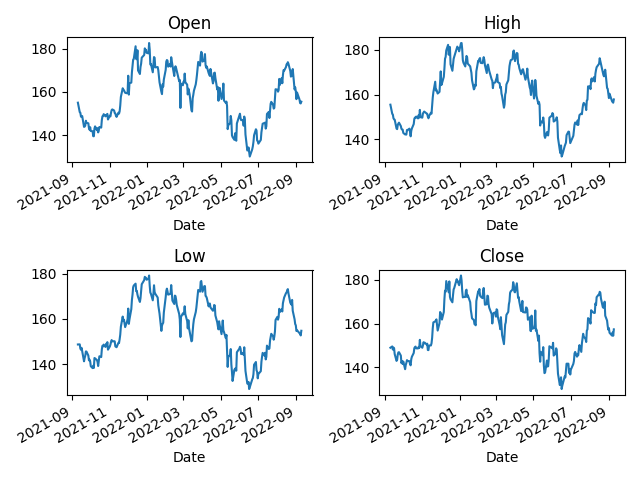

In [10]:
fig, ax = plt.subplots(2,2)
data['Open'].plot(ax=ax[0,0], title="Open")
data['High'].plot(ax=ax[0,1], title="High")
data['Low'].plot(ax=ax[1,0], title="Low")
data['Close'].plot(ax=ax[1,1], title="Close")
plt.tight_layout()

<IPython.core.display.Javascript object>


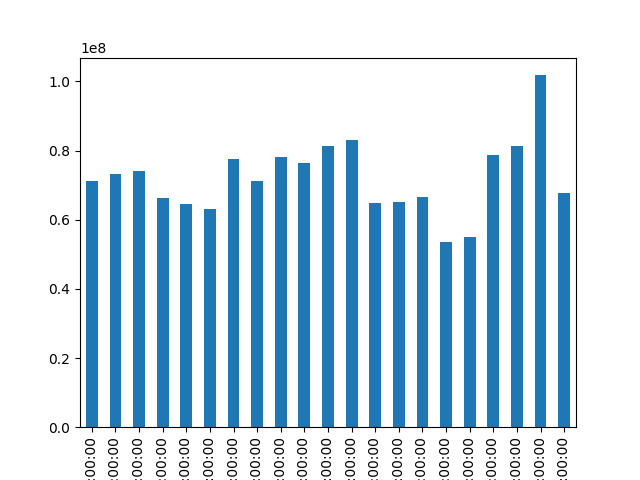

<AxesSubplot:xlabel='Date'>

In [13]:
fig, ax = plt.subplots()
data['Volume'].loc['2022-07-01':'2022-08-01'].plot.bar(ax=ax)

## Pandas-datareader

In [2]:
import pandas_datareader as pdr
import datetime as dt

In [7]:
ticker = 'AAPL'
start = dt.datetime(2019,1,1)

data = pdr.get_data_yahoo(ticker, start)
nasdaq_sym = pdr.get_nasdaq_symbols()
nasdaq_sym.loc['AAPL'], data.head()

(Nasdaq Traded                            True
 Security Name       Apple Inc. - Common Stock
 Listing Exchange                            Q
 Market Category                             Q
 ETF                                     False
 Round Lot Size                          100.0
 Test Issue                              False
 Financial Status                            N
 CQS Symbol                                NaN
 NASDAQ Symbol                            AAPL
 NextShares                              False
 Name: AAPL, dtype: object,
                  High        Low       Open      Close       Volume  Adj Close
 Date                                                                          
 2019-01-02  39.712502  38.557499  38.722500  39.480000  148158800.0  38.168350
 2019-01-03  36.430000  35.500000  35.994999  35.547501  365248800.0  34.366505
 2019-01-04  37.137501  35.950001  36.132500  37.064999  234428400.0  35.833584
 2019-01-07  37.207500  36.474998  37.174999  36.982498

## Calculating Simple TA
* Pct change
* log returns


<IPython.core.display.Javascript object>


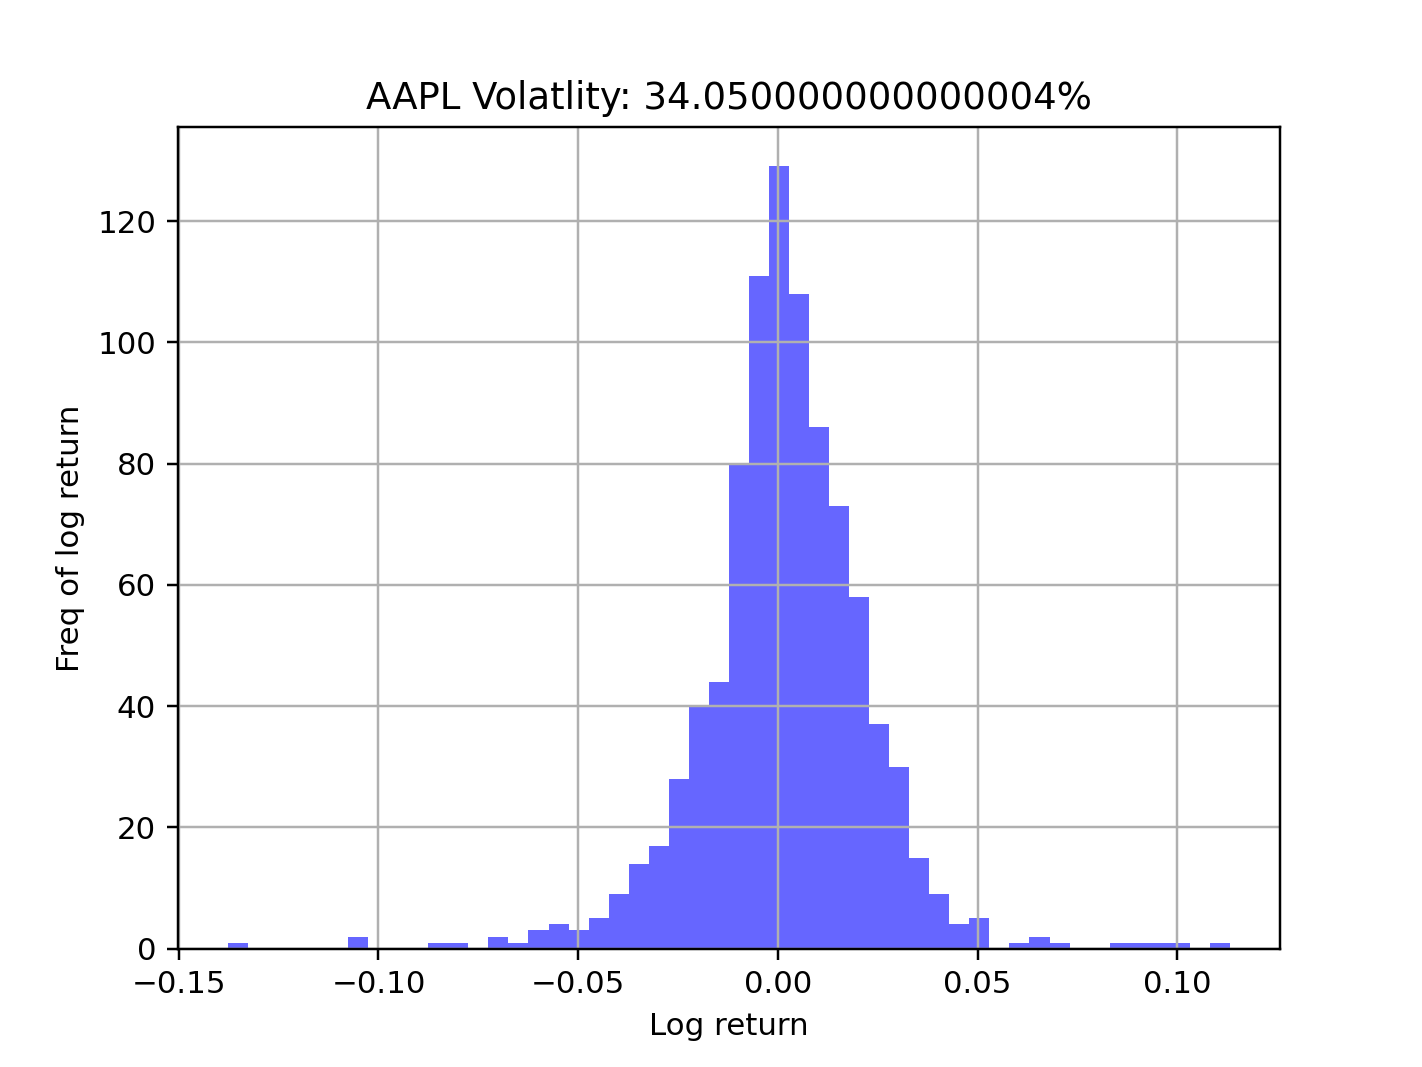

Text(0.5, 1.0, 'AAPL Volatlity: 34.050000000000004%')

In [34]:
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook
ticker = 'AAPL'
start = dt.datetime(2019,1,1)
data = pdr.get_data_yahoo(ticker, start)
data['%-chng'] = data['Close'].pct_change()
data['Log returns'] = np.log(data['Close']/data['Close'].shift())
volatility  = data['Log returns'].std()*252**.5
str_vol = str(round(volatility,4)*100)
fig, ax = plt.subplots()
data['Log returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel("Log return")
ax.set_ylabel("Freq of log return")
ax.set_title("AAPL Volatlity: " + str_vol + "%")

In [26]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()

In [27]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,%-chng,Log returns,MA10,MA50,EMA10
Date,,,,,,,,,,,
2022-09-02,160.360001,154.970001,159.750000,155.809998,76905200.0,155.809998,-0.013611,-0.013705,162.726001,156.8450,161.619487
2022-09-06,157.089996,153.690002,156.470001,154.529999,73714800.0,154.529999,-0.008215,-0.008249,161.422000,157.1024,160.330489
2022-09-07,156.669998,153.610001,154.820007,155.960007,87449600.0,155.960007,0.009254,0.009211,160.295001,157.3884,159.535856
2022-09-08,156.360001,152.679993,154.639999,154.460007,84923800.0,154.460007,-0.009618,-0.009664,158.988002,157.7288,158.612974
2022-09-09,157.820007,154.750000,155.470001,157.369995,68028800.0,157.369995,0.018840,0.018664,157.722002,158.0916,158.386978


<IPython.core.display.Javascript object>


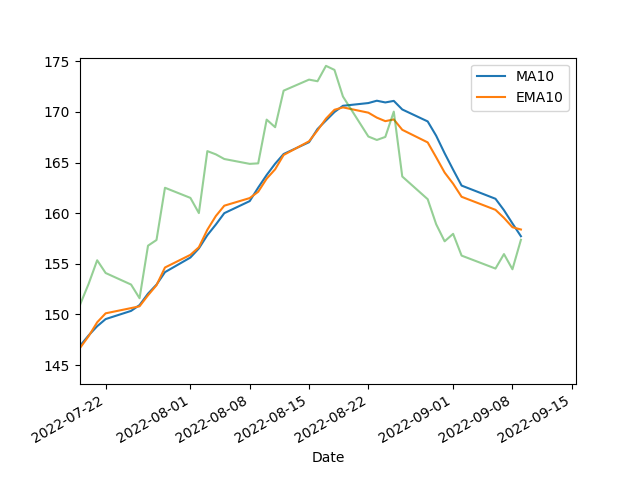

<AxesSubplot:xlabel='Date'>

In [31]:
fig, ax = plt.subplots()
data[['MA10', 'EMA10']].loc['2022-05-01':].plot(ax=ax)
data['Close'].loc['2022-05-01':].plot(ax=ax, alpha=0.5)

## MACD Calculation
* MACD is lagging indicator
* MACD = 12-Period EMA - 26-Period EMA
* Signal line 9-Period EMA of MACD

In [37]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()

<IPython.core.display.Javascript object>


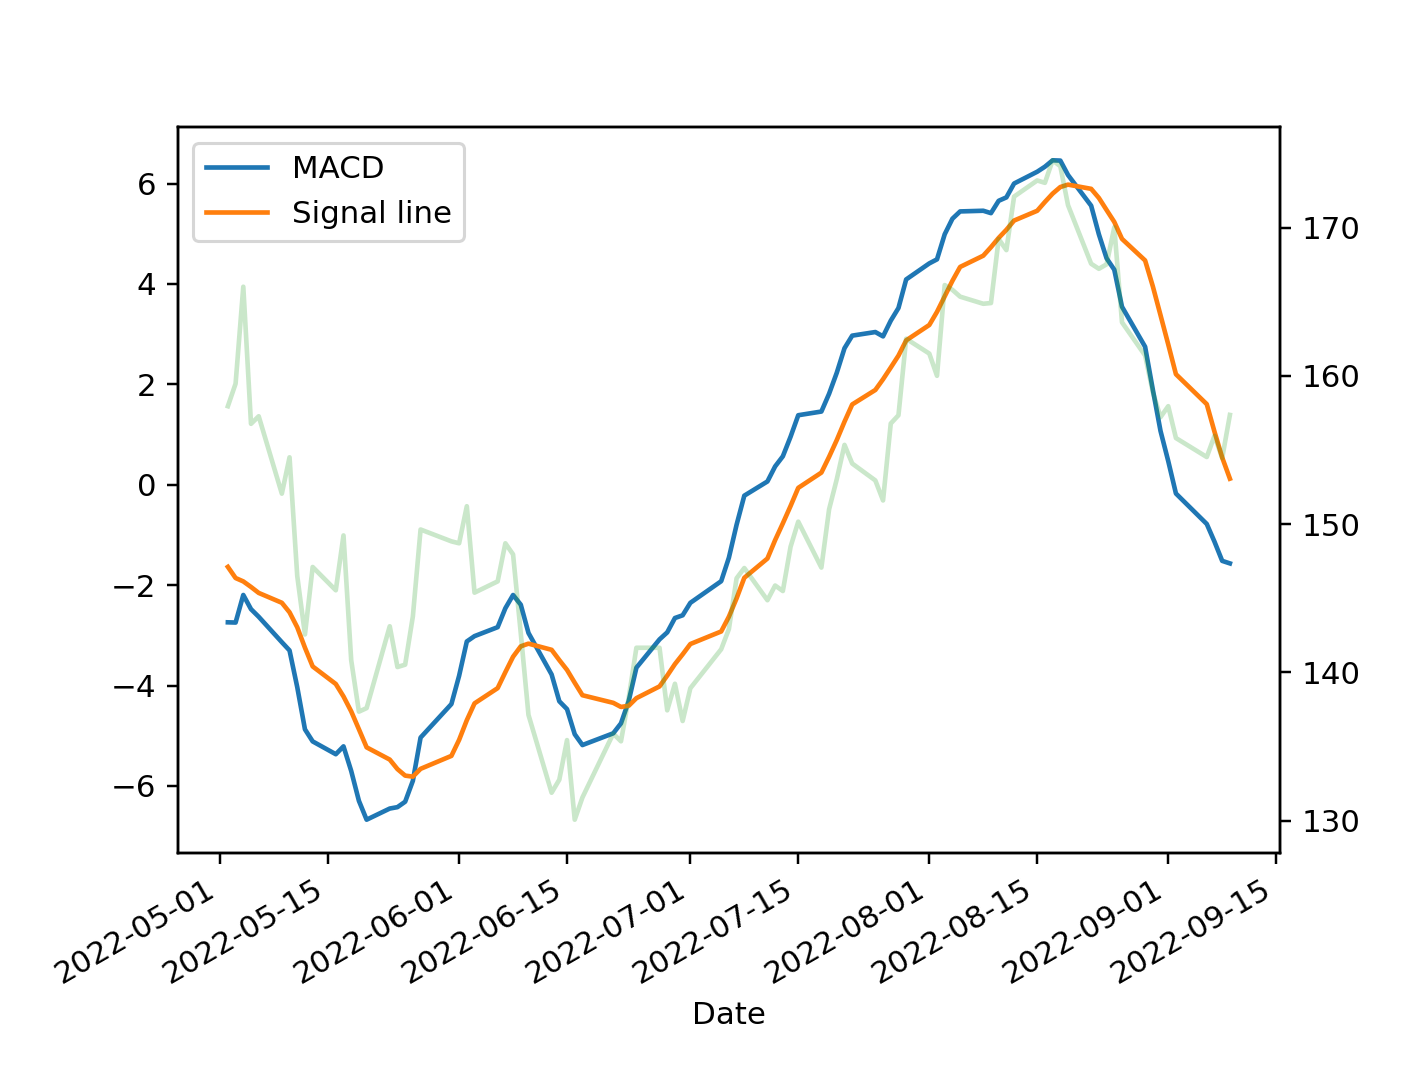

<AxesSubplot:>

In [40]:
fig, ax = plt.subplots()
data[['MACD', 'Signal line']].loc['2022-05-01':].plot(ax=ax)
data['Close'].loc['2022-05-01':].plot(ax=ax, alpha=0.25, secondary_y=True)

### Stochastic oscillator

In [44]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14)*100/(high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

<IPython.core.display.Javascript object>


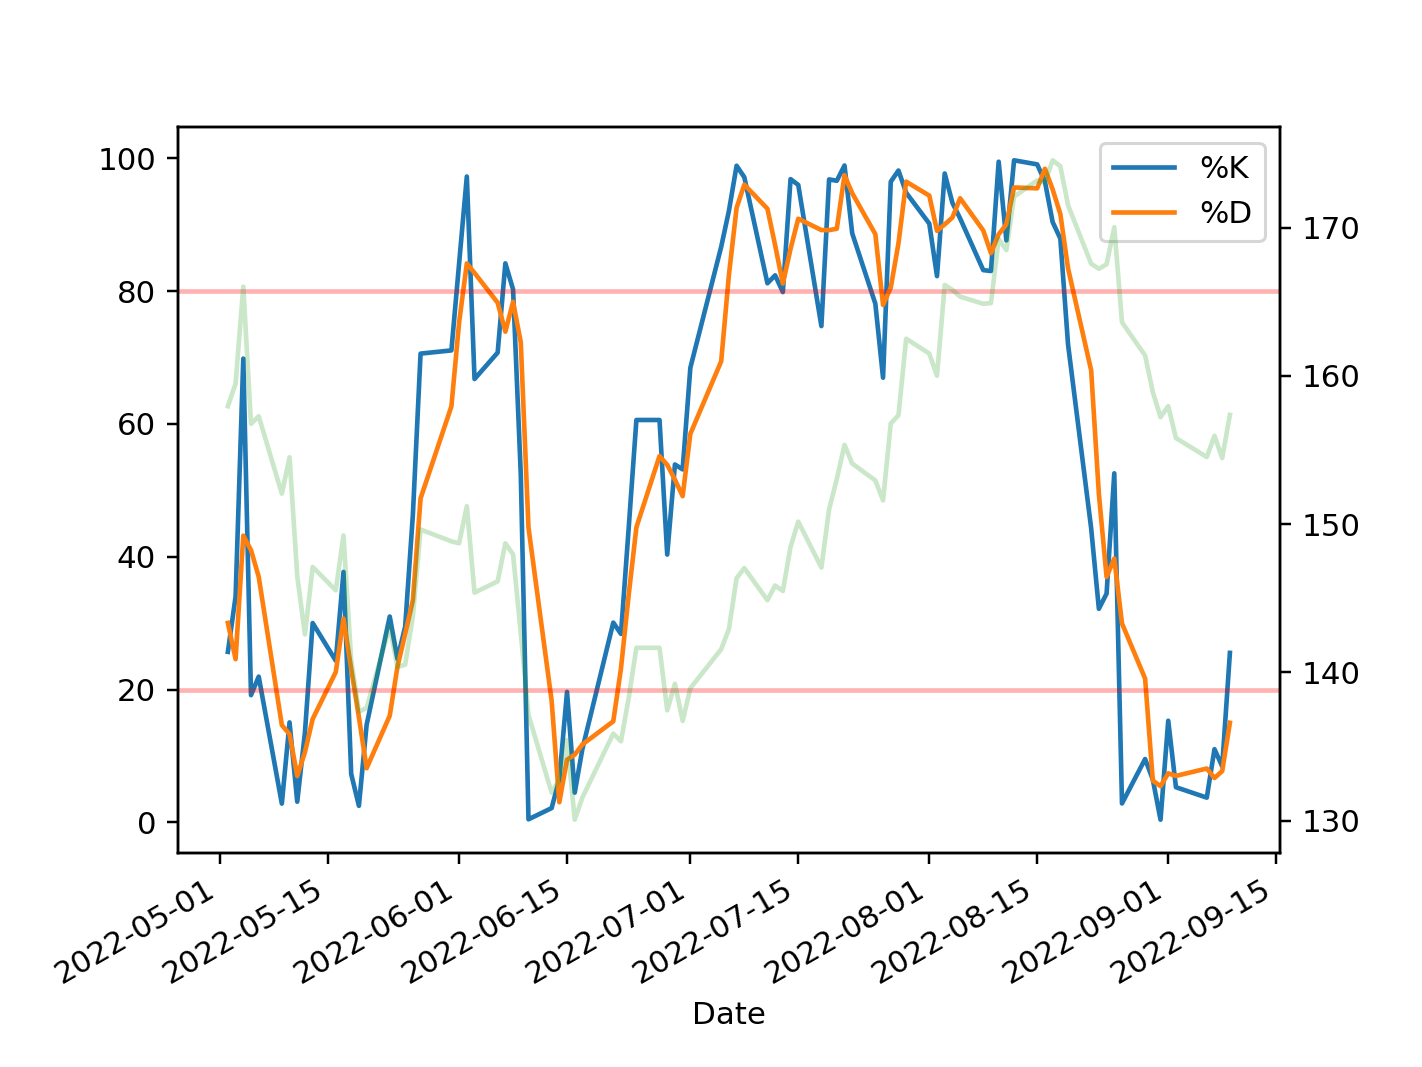

In [46]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2022-05-01':].plot(ax=ax)
data['Close'].loc['2022-05-01':].plot(ax=ax, alpha=0.25, secondary_y=True)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)

## Risk & Return Calculations 
